<a href="https://colab.research.google.com/github/Yanni-Dhevictor/Projetos-de-Data-Science/blob/master/Projeto_Detectando_Fraudes_em_Cart%C3%B5es_de_Cr%C3%A9dito_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Detecção de Fraudes em Cartões de Crédito

No ultimo ano, o número de ocorrências de fraudes de cartão de crédito aumentaram, alcançando a marca de quase 9 milhões de brasileiros lesados por esse tipo de golpe. 
Devido as medidas de contenção da pandemia do covid-19 com o lockdown, as compras feitas pelo comércio eletrônico dispararam e consequentemente o número de fraudes em cartões de crédito também.

<center><img src = "https://raw.githubusercontent.com/Yanni-Dhevictor/img/main/e-commerce-isometrico-conceito_52683-39811.jpg" width = 50% ></center>

Com o tempo as técnicas de fraude de cartões tem se diversificado e se tornaram mais sofisticadas, fazendo com que pessoas de qualquer nível de instrução caiam e golpes com um prejuízo de milhares de reais. Com o aumento do uso do comércio eletrônico, técnicas como phishing cresceram 80% e o golpes envolvendo engenharia social cresceram em 70%.

<center><img src = "https://raw.githubusercontent.com/Yanni-Dhevictor/img/main/Data_security_11.jpg" width = 50%></center>


Nesse projeto tenho o objetivo de tratar sobre as fraudes em cartões de crédito, no entanto, diferente dos projetos anteriores, iremos adicionar mais uma camada de conhecimento, que é o uso de técnicas de Interligência Artificial que já são usados em muitos sistemas bancários no processo de análise de comportamento dos portadores dos cartões identificando quando o verdadeiro usuário utiliza ou não o cartão de forma correta.

Com um melhor investimento na melhoria no ambiente de detecção de fraudes seria uma economia de grandes valores monetários para a empresa e tempo para o usuário do cartão.

##**Agora vamos para o nosso objetivo**
 
<center><img src = "https://raw.githubusercontent.com/Yanni-Dhevictor/img/main/team-goal.jpg", width=40% ></center>

##Captação dos dados

Os dados que serão utilizados neste projeto foram disponibilizados por algumas empresas européia de cartão de crédito no ano de 2013. Este dataset contém transações onde foram identificadas 492 fraudes de um total de 284,807 transações realizadas. Os dados se encontram altamente desbalanceados, a classe positiva (fraudes) contabilizam 0.17% de todas as transações.

Por motivos de confidencialidade, o dataset possui apenas valores de entrada nomeados como $[V1, V2, V3 \dots, V28]$ que serão considerados os componentes principais obtidos com PCA(`método de diminuição de dimensionalidade`), as únicas features que não foram transformadas foram as variáveis `Time` e `Amount`.

O método PCA possibilita a redução de dimensionalidade por meio da transformação de um grande conjunto de variáveis em tamanhos menores, no entanto que ainda contém maior parte das informações do conjunto maior.

Os dados utilizados nesse projeto podem ser recuperados no link do Kaggle de nome [Credit Card Fraud Detection]("https://www.kaggle.com/mlg-ulb/creditcardfraud"), onde é mais detalhadamente esplanado sobre os dados e as atualizações do dataset com um guia para melhor entendimento.

###Importando as bibliotecas necessárias

In [1]:
#Adicionando a biblioteca para o treino do modelo
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

!pip install -q scikit-plot

In [2]:
#Importando as bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import numpy as np
 
# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

file_path = ("https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1")
df = pd.read_csv(file_path)

###Importando os pacotes necesários



In [3]:
#Importando os pacotes para o modelo

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

###Realizando a análise exploratória


Nesse momento a análise exploratória dos dados terá o objetivo não só de resumir suas características principais, como também de encontrar informações que podemos não encontrar na modelagem de testes ou no teste de hipóteses.

<center><img alt="Analise Exploratoria" src= "https://raw.githubusercontent.com/Yanni-Dhevictor/img/main/analysis.jpg" width="45%" ></center>
<a href='https://br.freepik.com/vetores/negocio'>Negócio vetor criado por stories - br.freepik.com</a>

In [4]:
#Verificando as dimensões

print("Dimensões do Dataset",
    "\nVariáveis: ",df.shape[0],"\n" 
      "Entradas: ",df.shape[1])

Dimensões do Dataset 
Variáveis:  284807 
Entradas:  31


Aqui é identificado que o dataset possui 31 entradas e 284807 variáveis que preenchem essas entradas.
Posteriormente é feito uma análise sobre os 5 primeiros e 5 últimos entradas do conjunto de dados para identificar alguma comportamento anômalo ou um padrão que possa ser útil.

In [5]:
#Visualizando as 5 primeiras entradas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#Visualizando as 5 últimas entradas
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
#Visualizando o resumo estatístico
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


##Procurando por valores ausentes



In [8]:
#Verificando a quantidade de dados ausentes

df.isnull().sum().sort_values(ascending=False)

Class     0
V14       0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V15       0
Amount    0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Time      0
dtype: int64

De acordo com os dados acima o dataset não possui valores ausentes, sendo isso algo bom pois dessa forma outros fatores não irão interferir nos resultados das operações que serão feitas.

##Identificando o balanceamento das classes (Fraudes X Lícitas)

Nessa etapa é feita a leitura da quantidade de valores em na coluna `Class` para que dessa forma seja possível descobrir a proporção dos valores existentes.


<center><img alt="<a href='https://br.freepik.com/vetores/venda'>Venda vetor criado por rawpixel.com - br.freepik.com</a>" src = "https://raw.githubusercontent.com/Yanni-Dhevictor/Projetos-de-Data-Science/master/balance.jpg" width = 50%><center>

0    284315
1       492
Name: Class, dtype: int64

 As transações com fraude representam 0.1727% do dataset. 



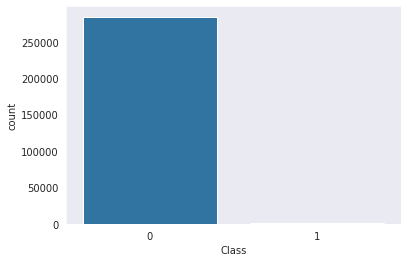

In [9]:
#Plotando o balanceamento das classes
print(df.Class.value_counts())
print("\n As transações com fraude representam {:.4f}% do dataset. \n".format((df[df.Class==1].shape[0] / df.shape[0]) * 100))

#Plotando o gráfico de barras para as classes
fig, ax = plt.subplots()
sns.countplot('Class',data=df);
fig.show()


A plotagem indica que o dataset praticamente não possui casos de fraudes, contabilizando somente 0.1727% de todos os valores registrados, demonstrando claramente que os dados estão desbalanceados, sendo necessário posteriormente um balanceamento desses dados para apurar o real caso desses dados.

<center><img alt = "<a href='https://br.freepik.com/vetores/desenho-animado'>Desenho animado vetor criado por vectorjuice - br.freepik.com</a>" src = "https://raw.githubusercontent.com/Yanni-Dhevictor/Projetos-de-Data-Science/master/personal-investigation.jpg" width = 50% ></center>

Agora uma análise sobre as variáveis `Time` e `Amount` para ver se possuem dados que valem a pena ser utilizados. 

In [10]:
#Separando a Classe em épocas 
df_Tclass = df.iloc[:,[0,30]]

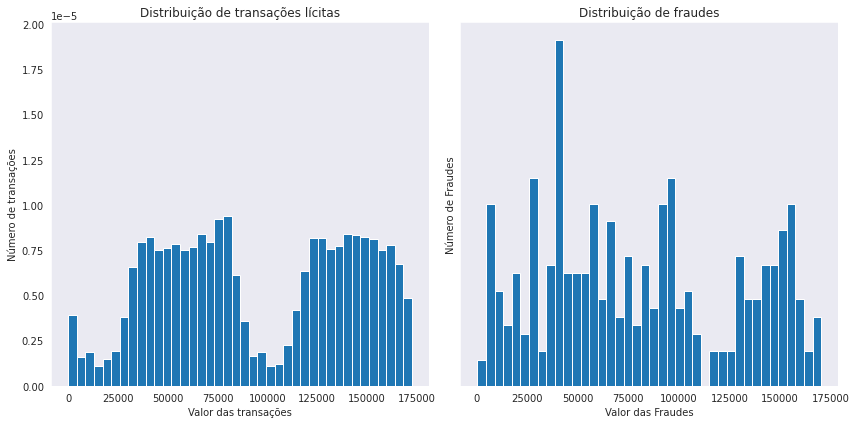

In [11]:
#Plotagem do histograma da variável Time por Classes
fig, ax = plt.subplots(nrows=1,ncols=2, sharey=True,tight_layout=True,figsize=(12,6))

ax[0].hist(df_Tclass.Time[df_Tclass.Class==0],density = True,bins=40)
ax[0].set_title("Distribuição de transações lícitas")
ax[0].set_xlabel("Valor das transações")
ax[0].set_ylabel("Número de transações")


ax[1].hist(df_Tclass.Time[df_Tclass.Class==1],density = True,bins=40)
ax[1].set_title("Distribuição de fraudes")
ax[1].set_xlabel("Valor das Fraudes")
ax[1].set_ylabel("Número de Fraudes")

plt.tight_layout()
plt.show()

Os dados mostram que nas transações lícitas a quantidade de operações chegam próximo a 100000 (cem mil) que vão de valores de 25000(vinte e cinto mil) até 175000 (cento e setenta e cinco mil), tendo uma queda somente a valores entre 75000 (setenta e cinco mil) e  125000 (cento e vinte cinco mil). Em resumo a quantidade de transações lícitas possui um comportamento mais estável entre a quantidade dos valores transacionados.



Para dar melhor prosseguimento a análise dos dados é necessário a separação dos dados de fraude dos que são normais.

In [12]:
#Separando o montante e Classe
df_classmont = df.iloc[:, [30,29]]


###Atenção às análises

<center><img  src= "https://raw.githubusercontent.com/Yanni-Dhevictor/img/main/illustration-concept.jpg" width = 40%></center>
<a href="http://www.freepik.com">Designed by pikisuperstar / Freepik</a>

In [13]:
#Separando os dados
df_frd = df_classmont.Amount[df_classmont.Class == 1]
df_lic = df_classmont.Amount[df_classmont.Class == 0]


###Transações fraudulentas

Os dados informam que o número de pessoas vítimas de transações fraudulentas decresce a medida de a quantidade de fraudes aumentam, em outras palavras, a frequência de atingidos se mantém abaixo dos 200 à medida que a quantidade de fraudes aumenta.

Text(0, 0.5, 'Frequência de casos')

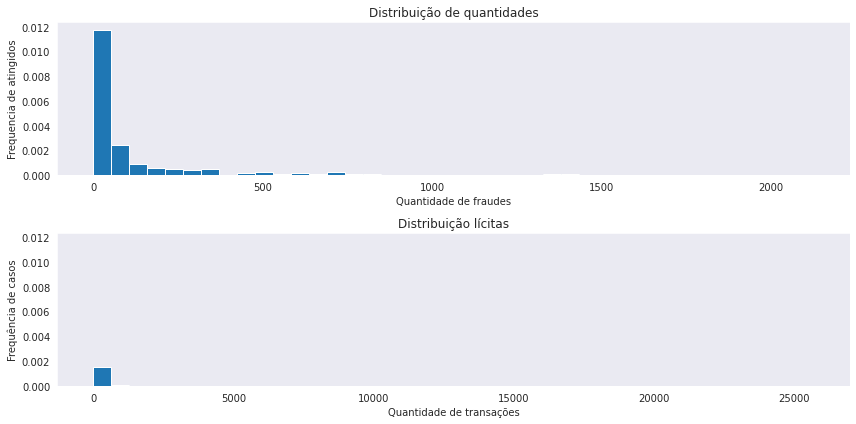

In [14]:
#Plotagem do histograma da variável Amount
fig, ax = plt.subplots(nrows = 2, ncols = 1, sharey = True, tight_layout = True, figsize=(12,6))

ax[0].hist(df_frd,density = True,bins = 40)
ax[0].set_title("Distribuição de quantidades")
ax[0].set_xlabel("Quantidade de fraudes")
ax[0].set_ylabel("Frequencia de atingidos")

ax[1].hist(df_lic,density= True, bins = 40)
ax[1].set_title("Distribuição lícitas")
ax[1].set_xlabel("Quantidade de transações")
ax[1].set_ylabel("Frequência de casos")

###Transações lícitas
Já os dados das transações lícitas ficam menos favoráveis a identificação e compreensão, no entanto os valores apresentados informas que o número de transações líticas se manteve abaixo dos 200 casos registrados no dataset.

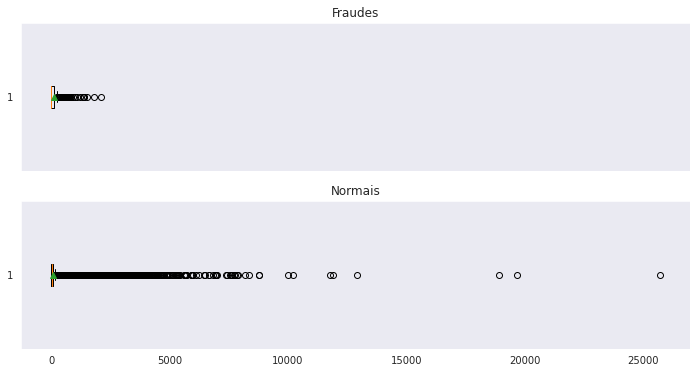

In [15]:
#Plotando os valores de ocorrência que houveram Fraudes
fig, ax = plt.subplots(nrows = 2,ncols = 1,figsize=(12,6),sharex=True)


ax[0].boxplot(df_frd, vert = False ,showmeans = True)
ax[0].set_title("Fraudes")
ax[1].boxplot(df_lic, vert = False, showmeans = True)
ax[1].set_title("Normais")

#df.loc[df['Class']==1].boxplot('Amount',ax=ax,vert=False,figsize=(8,6))

#df.loc[df['Class']==0].boxplot('Amount',ax=ax,vert=False,figsize=(8,6))

plt.show();

Pelo fato dos dados acima estarem dispostos de forma que se torna impraticável a obtenção de dados úteis para a análise, é necessário uma ampliação na plotagem para que seja possível observar os quartís com clareza.

<center><img src = "https://raw.githubusercontent.com/Yanni-Dhevictor/img/main/20943599.jpg" width = 50%></center>

<a href='https://br.freepik.com/vetores/abstrato'>Abstrato vetor criado por vectorjuice - br.freepik.com</a>

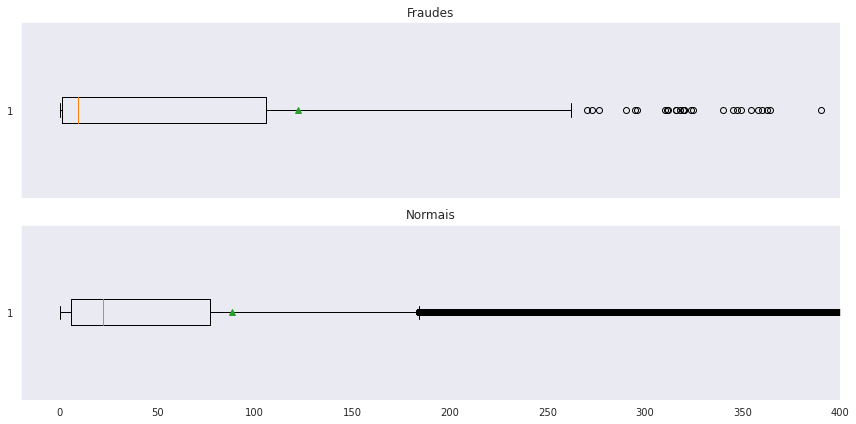

In [17]:
#Ampliando os plots anteriores
fig, ax = plt.subplots(nrows=2, ncols = 1, figsize=(12,6),sharex=True)

ax[0].boxplot(df_frd, vert = False, showmeans = True)
ax[0].set_title("Fraudes")
ax[1].boxplot(df_lic, vert = False, showmeans = True)
ax[1].set_title("Normais")

plt.xlim((-20,400))
plt.tight_layout()

Com o boxplot ampliado, se torna mais fácil agora encontrar os valores de mínimo, mediana e máximo assim como analisar os valores de outliers existentes em ambas plotagens. Lembrando que essas plotagens são dos dados desbalanceados.

Sabendo que o objetivo de um boxplot é visualizar e resumir uma variável quantitativa os dados indicam que em transações fraudulentas 25% dos dados equivalem a aproximadamente 5 pessoas afetadas , já a mediana equivale a 10 pessoas e 75% equivalem a 100 pessoas, com o limite superior chegando a quase 250 pessoas que foram vítimas de fraudes.

<center><img alt="hacker_credit_card" src="https://raw.githubusercontent.com/Yanni-Dhevictor/img/main/hacker_credit_card.jpg" width="40%"></center>
<a href='https://br.freepik.com/vetores/projeto'>Projeto vetor criado por macrovector - br.freepik.com</a>

Já o gráfico das transações líticas é possível notar que 25% das transações foram realizadas entre 5 até próximo a 20 pessoas, com a mediana batendo aproximadamente 20 pessoas, enquando que os outros 25% chegam a valores próximos a 70 pessoas com um limite superior de 170 pessoas que realizaram transações lícitas

<center><img alt="safe_credit_card" src="https://raw.githubusercontent.com/Yanni-Dhevictor/img/main/safe_creditcard.jpg" width="40%"></center>
<a href='https://br.freepik.com/vetores/negocio'>Negócio vetor criado por pikisuperstar - br.freepik.com</a>

Seguindo para a próxima fase, é lidar com a matrix de correlação que possibilitar demonstrar uma possível correlação entre os diferentes atributos existentes no dataset.

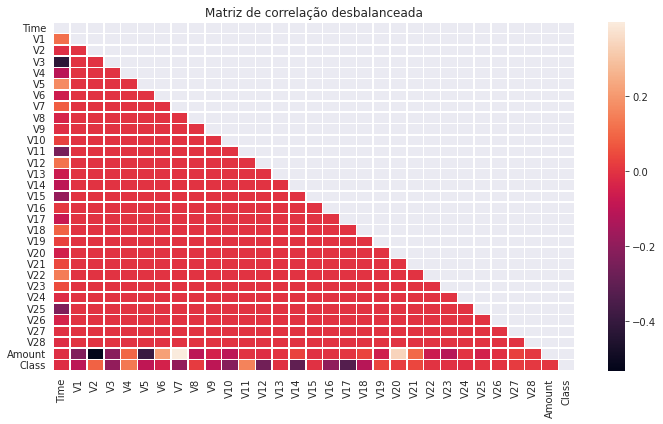

In [28]:
#correlação
plt.figure(figsize = (10, 6))
plt.title("Matriz de correlação desbalanceada")
correlation = df.corr()
mask = np.triu(correlation)
#plotagem da matriz de correlação

plot = sns.heatmap(correlation,fmt=".1f",linewidths=.6,mask=mask)
plt.tight_layout()
plt.show()


Para facilitar o entendimento, há a versão da plotagem com o valores de correlação organizado com o nível de ocorrências, sendo as que mais se relacionam a que possuem uma característica mais "quente". 

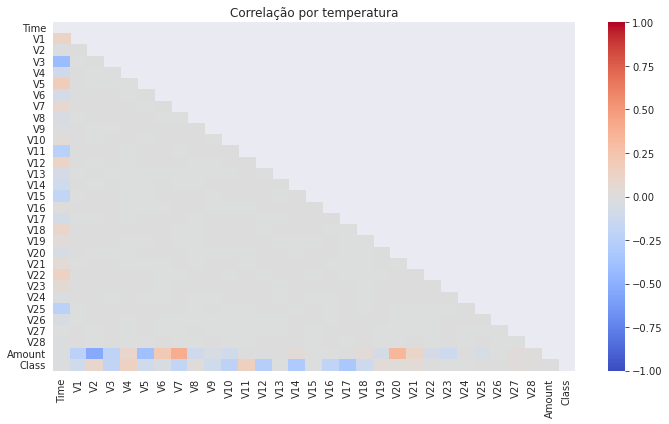

In [29]:
plt.figure(figsize = (10, 6))
plt.title("Correlação por temperatura")
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap='coolwarm',mask=mask)
plt.tight_layout()
plt.show()

##Modelo Desbalanceado

Nessa etapa iremos treinar o modelo de Machine Learning, tendo já noção de que os dados acima estão representando um dataset desbalanceado, portanto como uma demonstração final, mostrarei a diferença entre um modelo treinado com dados desbalanceados e posteriormente com os dados sendo devidamente balanceados.

Para isso seguirei as etapas comuns para construção de qualquer modelo de Machine Learning, acompanhe abaixo.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Relatório de classificação: 
               precision    recall  f1-score   support

           0     0.9995    0.9995    0.9995     71079
           1     0.7083    0.6911    0.6996       123

    accuracy                         0.9990     71202
   macro avg     0.8539    0.8453    0.8495     71202
weighted avg     0.9990    0.9990    0.9990     71202

Acurácia: 0.9990

AUC: 0.8453



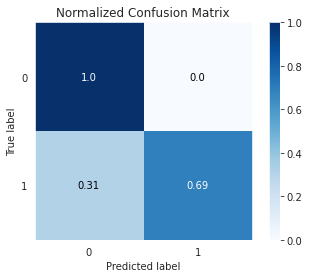

In [22]:
#Separando as variáveis de X e y
X = df.drop('Class',axis=1)
y = df['Class']

#Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle = True)

#Escolhendo e instanciando o modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train,y_train)

#Fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict(X_test)

#Plotando a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize = True)

#Imprimir relatório de classificação
print("\nRelatório de classificação: \n", classification_report(y_test, y_pred, digits=4))

#Imprimindo a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

#Imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test,y_pred)))

fig.show()

Desse gráfico é possível extrair que o modelo conseguiu identificar bem as instancias quando o 'df.Class == 0' ou seja, transações normais no entanto seu resultado não foi agradável quanto a identificação de instancias onde as transações são fraudulentas, atingindo somente a porcentagem de 67% (ou 0,67)

<center><img alt="programmer" src="https://raw.githubusercontent.com/Yanni-Dhevictor/img/main/programmer.jpg" width="40%"></center>
<a href='https://br.freepik.com/vetores/pessoas'>Pessoas vetor criado por pikisuperstar - br.freepik.com</a>

Com os dados do desbalanceados o modelo de Machine Learning retornou uma acurácia de 99%, um resultado espetacular se o dataset não estivesse desbalanceado, no entanto para realmente seja obtido dados úteis e reais possibilitando dessa forma detectar os *casos de fraude de cartão de crédito*, se faz necessário o balanceamento dos dados antes do treino, para isso será usado o **under-sampling**, acompanhe abaixo.


1    369
0    369
dtype: int64


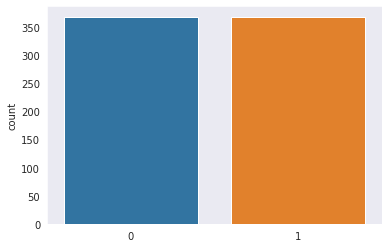

In [23]:
#Usando o under-sampling
rus = RandomUnderSampler()
X_res, y_res = rus.fit_sample(X_train,y_train)

#Ver o balanceamento de classes
print(pd.Series(y_res).value_counts())

#Plotando a nova distribuição de classes
sns.countplot(y_res);

Comparando agora a matriz de correlação balanceada, é possível notar um diferença visível entre as variáveis do dataset e seus relacionamentos.

In [24]:
#Novo Dataframe balanceado
correlation_balanced = pd.DataFrame(X_res).corr()

In [25]:
#Criando a máscara diagonal superior
mask = np.zeros_like(correlation_balanced)
mask[np.triu_indices_from(mask)] = True

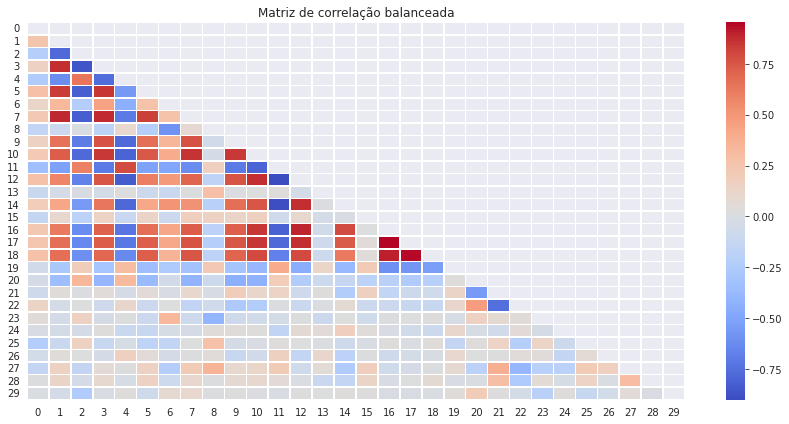

In [26]:
#Plotando matriz de correlação Balanceada
plt.figure(figsize = (12, 6))
plt.title("Matriz de correlação balanceada")

sns.heatmap(correlation_balanced,mask = mask , fmt=".1f",linewidths=.6,cmap = 'coolwarm')
plt.tight_layout()
plt.show()



Após o balanceamento dos dados a matriz de correlação se apresenta um pouco mais clara de identificar quais variáveis realmente estão possuindo uma correlação tornando o entendimento sobre o dataset.

Com os dados agora devidamento balanceados, o problema inicial que foi encontrado não afetará mais os resultados das operações realizadas adiante.

Agora os dados balanceados passam por um treino e com isso será possível determinar a disparidade entre os dados balanceados e desbalanceados.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9669    0.9831     71079
           1     0.0447    0.8943    0.0851       123

    accuracy                         0.9668     71202
   macro avg     0.5222    0.9306    0.5341     71202
weighted avg     0.9982    0.9668    0.9815     71202

Acurácia: 0.9668

AUC: 0.9306



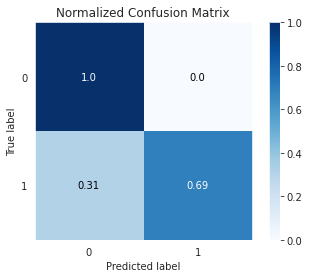

In [30]:
#Instanciando e treinando o modelo de regressão logistica
model_res = LogisticRegression()
model_res.fit(X_res, y_res)

#Realizando a previsão em cima dos dados de teste
y_pred_res = model_res.predict(X_test)
y_proba_res = model_res.predict_proba(X_test)

#Plotando a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test,y_pred,normalize=True)

#Imprimindo o classification report
print("Relatório de Classificação:\n", classification_report(y_test,y_pred_res,digits=4))

#Imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test,y_pred_res)))

#Imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test,y_pred_res)))


Analisando os resultados obtidos e comparando com os valores anteriores é possível perceber uma pequena diminuição na acurácia de 99% com dados desbalanceados para 92% com os dados balanceados, no entanto os outro valores permaneceram o mesmo.

#Conclusão

Ao lidar com dados para treino e teste de um modelo de machine learning é de fundamental atividade analisar o balanceamento dos dados e entender o que ele está querendo dizer para você, compreender qual a finalidade daquele modelo também vai definir como você irá estruturar seu projeto, pois a medida que a pesquisa estiver sendo feita, irão aparecer inúmeros métodos de balancear os dados com objetivos e características singulares, por isso não é só um processo de "investigação" dos dados para retirar respostas, mas encontrar a melhor forma de responder as perguntas que são feitas para aquele que irá manipular esses dados.

Obrigado por ler o projeto até aqui e agradeço sua atenção.

<center><img alt="light_bulb" src="https://raw.githubusercontent.com/Yanni-Dhevictor/img/main/light-bulb.jpg" width="50%"></center>
<a href='https://br.freepik.com/vetores/luz'>Luz vetor criado por rawpixel.com - br.freepik.com</a>